In [1]:
!pip install transformers

In [2]:
from transformers import AutoModelForCausalLM, Trainer, TrainingArguments

#!pip install transformers[torch]

! pip install accelerate -U

# **Importing the Basic Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.csv to Amazon (1).csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Apple.csv to Apple (1).csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Facebook.csv to Facebook (1).csv


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Google.csv to Google (1).csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving Netflix.csv to Netflix (1).csv


# **Loading all the Datasets**

In [9]:
# Loading all csv files

amazon_dataset = pd.read_csv('/content/Amazon.csv')

apple_dataset = pd.read_csv('/content/Apple.csv')

facebook_dataset = pd.read_csv('/content/Facebook.csv')

google_dataset = pd.read_csv('/content/Google.csv')

netflix_dataset = pd.read_csv('/content/Netflix.csv')

Checking size of the individual Datasets

In [10]:
print("size of amazon dataset:",amazon_dataset.shape)

print("size of apple dataset:",apple_dataset.shape)

print("size of facebook dataset:",facebook_dataset.shape)

print("size of google dataset:",google_dataset.shape)

print("size of netflix dataset:",netflix_dataset.shape)

size of amazon dataset: (1761, 7)
size of apple dataset: (1761, 7)
size of facebook dataset: (1761, 7)
size of google dataset: (1761, 7)
size of netflix dataset: (1761, 7)


Checking head of the Individual Datasets

In [11]:
amazon_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


In [12]:
apple_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745996,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048864,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051125,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388372,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.325430,237458000


In [13]:
facebook_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [14]:
google_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582


In [15]:
netflix_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,49.151428,50.331429,48.731430,49.848572,49.848572,13475000
1,2015-01-05,49.258572,49.258572,47.147144,47.311428,47.311428,18165000
2,2015-01-06,47.347141,47.639999,45.661430,46.501431,46.501431,16037700
3,2015-01-07,47.347141,47.421429,46.271427,46.742859,46.742859,9849700
4,2015-01-08,47.119999,47.835712,46.478573,47.779999,47.779999,9601900


Creating a column in each dataframe to show the company name of its respective company

In [16]:
amazon_dataset['company'] = 'amazon'

apple_dataset['company'] = 'apple'

facebook_dataset['company'] = 'facebook'

google_dataset['company'] = 'google'

netflix_dataset['company'] = 'netflix'

Checking head of the Individual Datasets after adding a column

In [17]:
amazon_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,amazon
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,amazon
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,amazon
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,amazon
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400,amazon


In [18]:
apple_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745996,212818400,apple
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048864,257142000,apple
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051125,263188400,apple
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388372,160423600,apple
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.325430,237458000,apple


In [19]:
facebook_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500,facebook
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200,facebook
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300,facebook
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300,facebook
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000,facebook


In [20]:
google_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563,google
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840,google
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,google
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054,google
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582,google


In [21]:
netflix_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2015-01-02,49.151428,50.331429,48.731430,49.848572,49.848572,13475000,netflix
1,2015-01-05,49.258572,49.258572,47.147144,47.311428,47.311428,18165000,netflix
2,2015-01-06,47.347141,47.639999,45.661430,46.501431,46.501431,16037700,netflix
3,2015-01-07,47.347141,47.421429,46.271427,46.742859,46.742859,9849700,netflix
4,2015-01-08,47.119999,47.835712,46.478573,47.779999,47.779999,9601900,netflix


# **Creating FAANG dataset by combingin each dataset**

Concating each data frames into one single Dataframe FAANG Dataset as Each Dataset contains same features and the last created column represents the company name as that indicates which company stock is it and the prices of it

In [22]:
#FAANG_Dataset = pd.concat([amazon_dataset,apple_dataset,facebook_dataset,google_dataset,netflix_dataset])

In [23]:
FAANG_Dataset = pd.concat([amazon_dataset,apple_dataset,facebook_dataset,google_dataset,netflix_dataset])

# **Data Cleaning and Exploratory Data Analysis**

In [24]:
FAANG_Dataset= FAANG_Dataset.sort_values(by='Date')

In [25]:
FAANG_Dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,amazon
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745996,212818400,apple
0,2015-01-02,49.151428,50.331429,48.731430,49.848572,49.848572,13475000,netflix
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500,facebook
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563,google


In [26]:
FAANG_Dataset.shape

(8805, 8)

In [27]:
FAANG_Dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,8.805000e+03
mean,681.490386,688.619778,674.059374,681.575774,681.281808,3.515494e+07
std,831.402806,839.861533,822.388005,831.238223,831.463475,6.099284e+07
min,22.500000,22.917500,22.367500,22.584999,21.036304,3.468000e+05
25%,115.300003,117.000000,113.750000,115.209999,115.029999,2.835600e+06
50%,325.899994,329.859985,320.230011,325.079987,325.079987,7.980000e+06
75%,971.789978,976.770020,962.500000,970.669983,970.669983,2.678260e+07
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,6.488252e+08


In [28]:
FAANG_Dataset.describe(include="object")

,Date,company
count,8805,8805
unique,1761,5
top,2015-01-02,amazon
freq,5,1761


In [29]:
FAANG_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8805 entries, 0 to 1760
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8805 non-null   object 
 1   Open       8805 non-null   float64
 2   High       8805 non-null   float64
 3   Low        8805 non-null   float64
 4   Close      8805 non-null   float64
 5   Adj Close  8805 non-null   float64
 6   Volume     8805 non-null   int64  
 7   company    8805 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 619.1+ KB


In [30]:
FAANG_Dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
company       object
dtype: object

In [31]:
FAANG_Dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'company'],
      dtype='object')

In [32]:
FAANG_Dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
company      0
dtype: int64

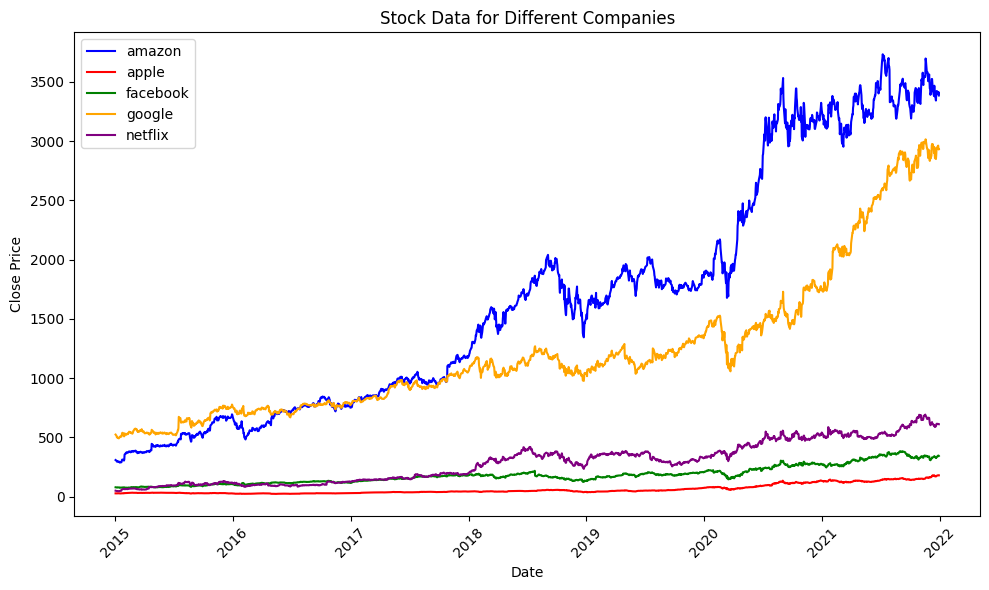

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming you have loaded your dataset into a DataFrame named 'df'

# Convert 'Date' column to datetime if it's not already in datetime format
FAANG_Dataset['Date'] = pd.to_datetime(FAANG_Dataset['Date'])

# Group data by 'company'
grouped = FAANG_Dataset.groupby('company')

# Plotting data for each company separately
plt.figure(figsize=(10, 6))

# Define colors for each company
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed

for i, (company, data) in enumerate(grouped):
     plt.plot(data['Date'], data['Close'], label=company, color=colors[i])

plt.title('Stock Data for Different Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



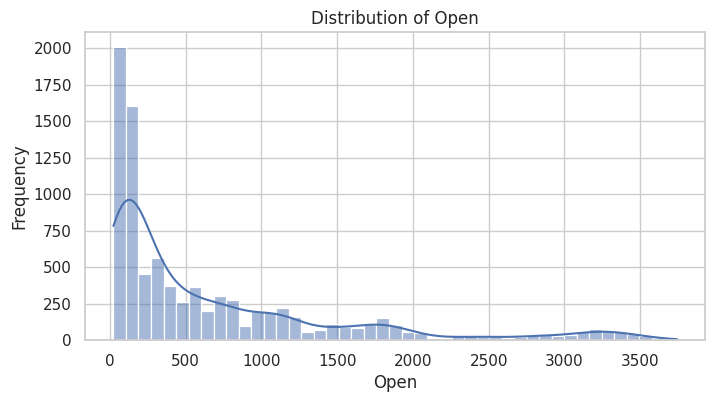

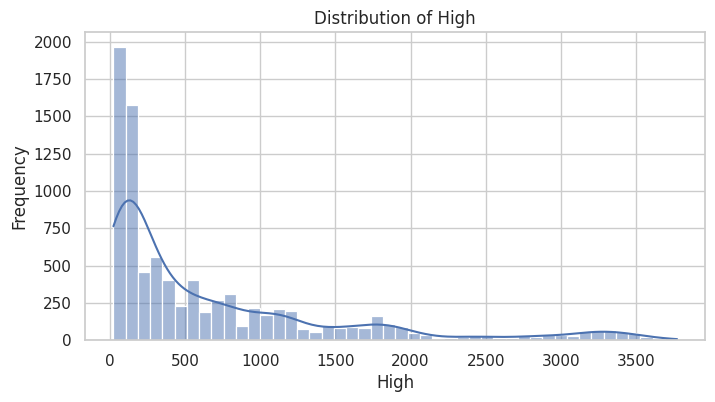

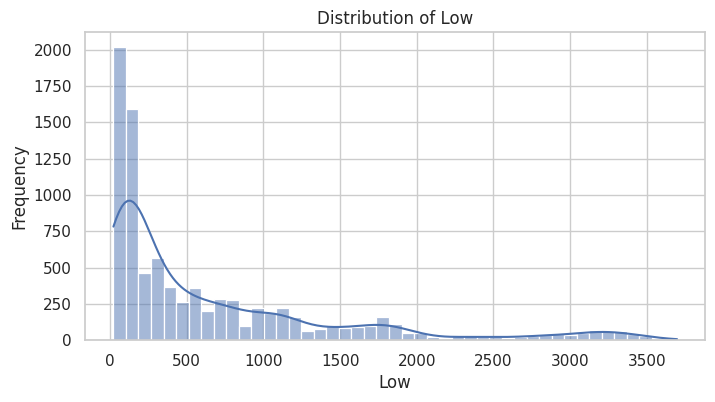

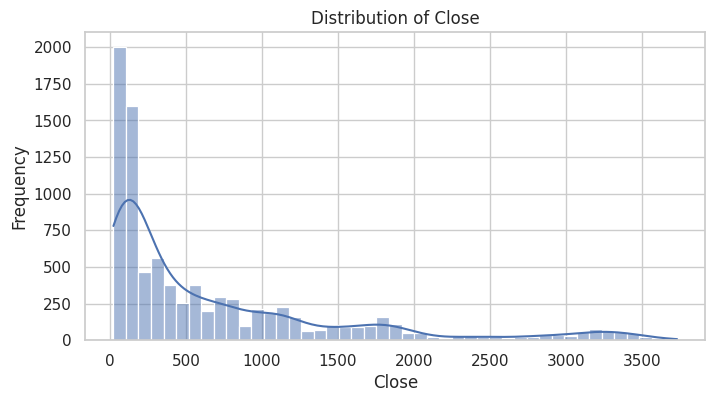

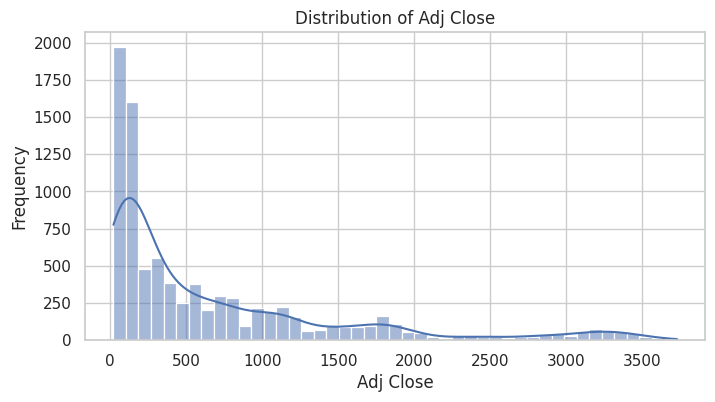

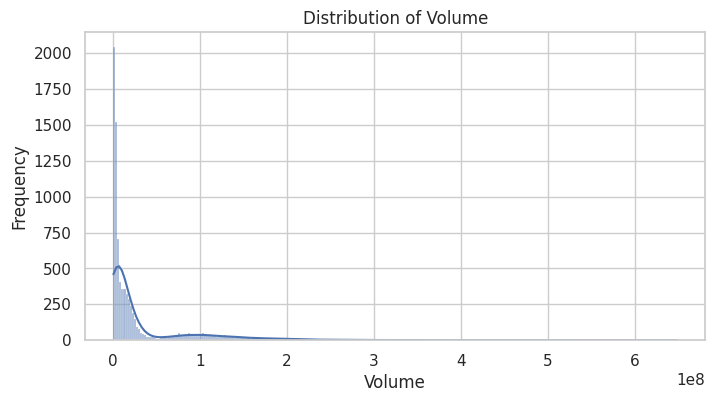

In [34]:
# Setting the style for Seaborn plots
sns.set(style="whitegrid")

# Visualizing numerical variables using histograms
numerical_vars = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for var in numerical_vars:
     plt.figure(figsize=(8, 4))
     sns.histplot(FAANG_Dataset[var], kde=True)
     plt.title(f'Distribution of {var}')
     plt.xlabel(var)
     plt.ylabel('Frequency')
     plt.show()

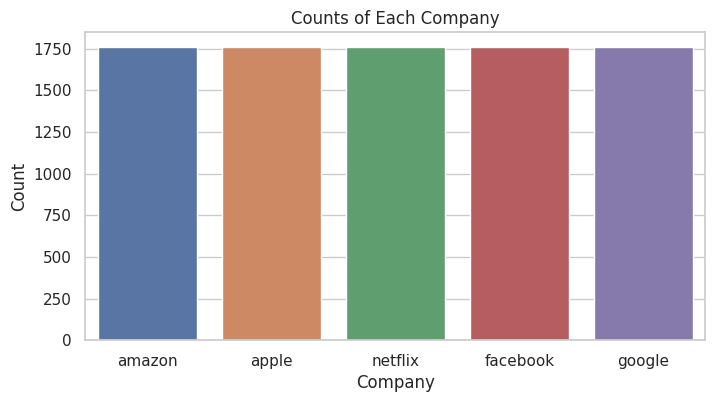

In [35]:
# Visualizing categorical variable 'company' using a countplot
plt.figure(figsize=(8, 4))
sns.countplot(data=FAANG_Dataset, x='company')
plt.title('Counts of Each Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

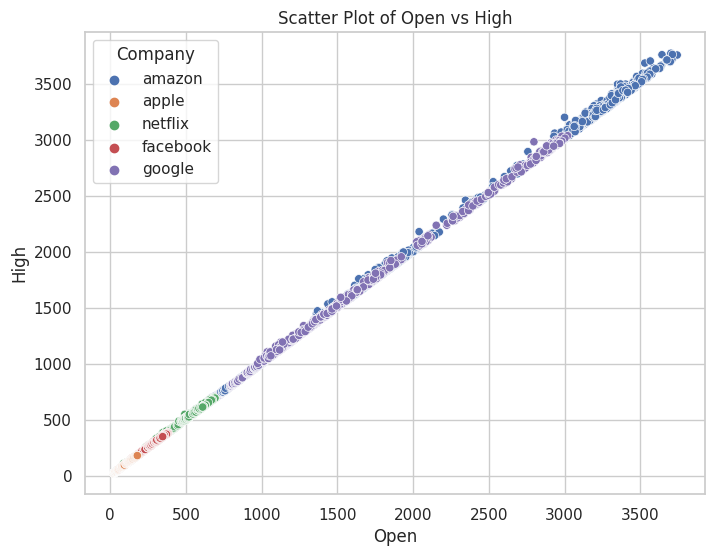

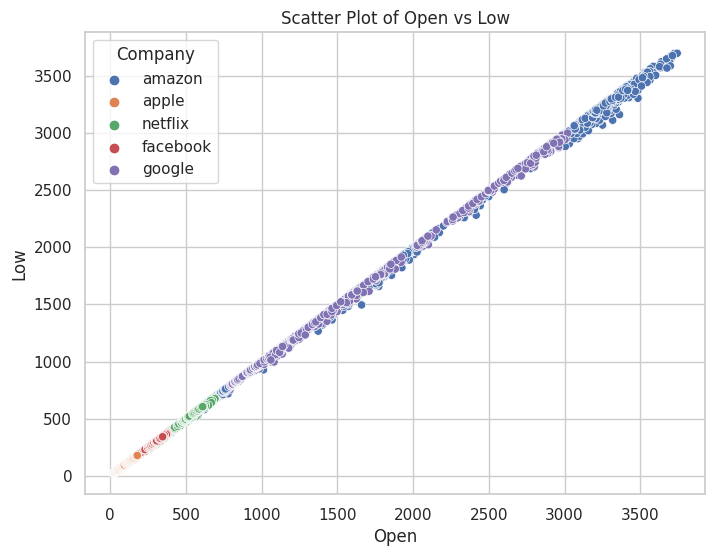

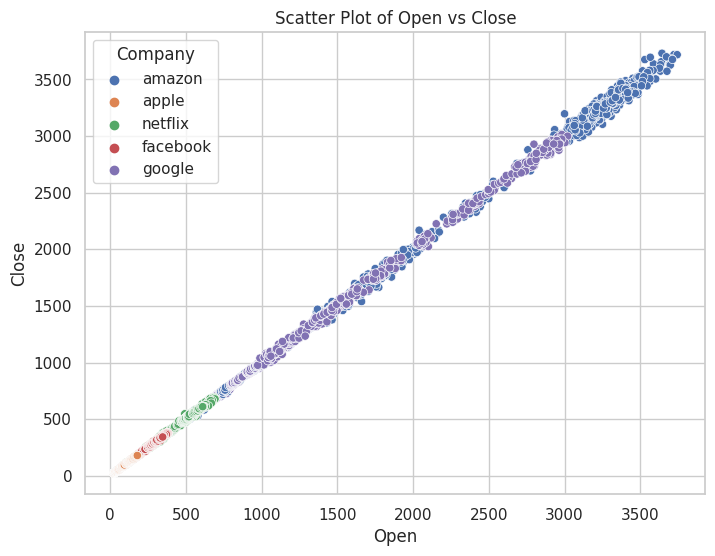

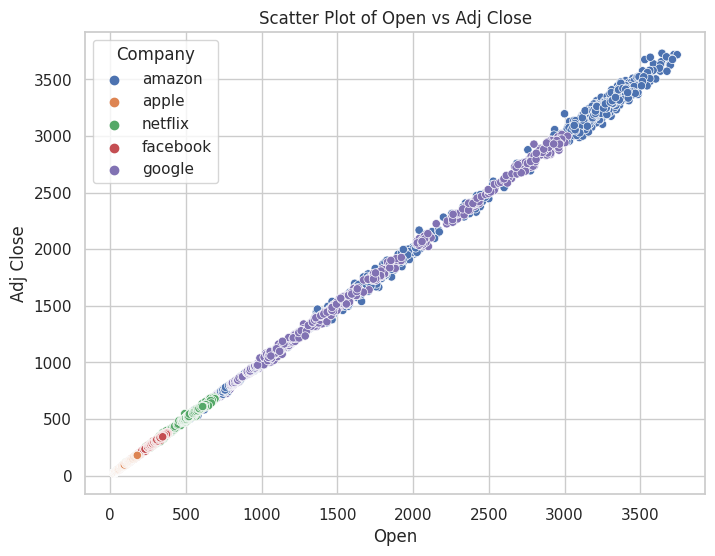

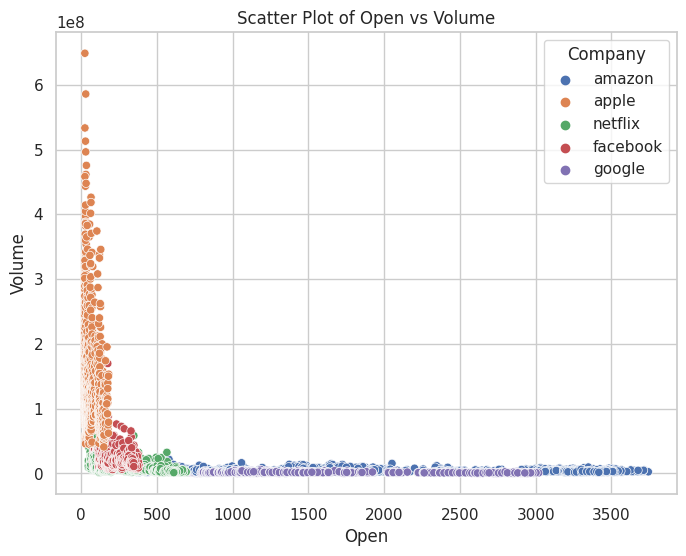

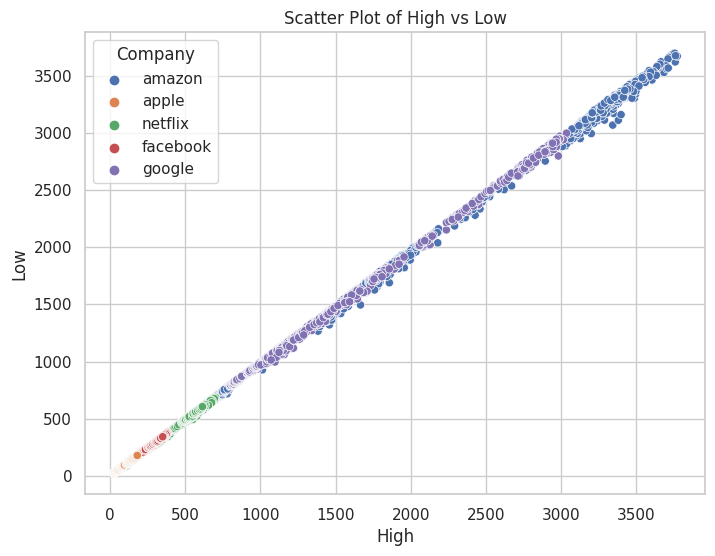

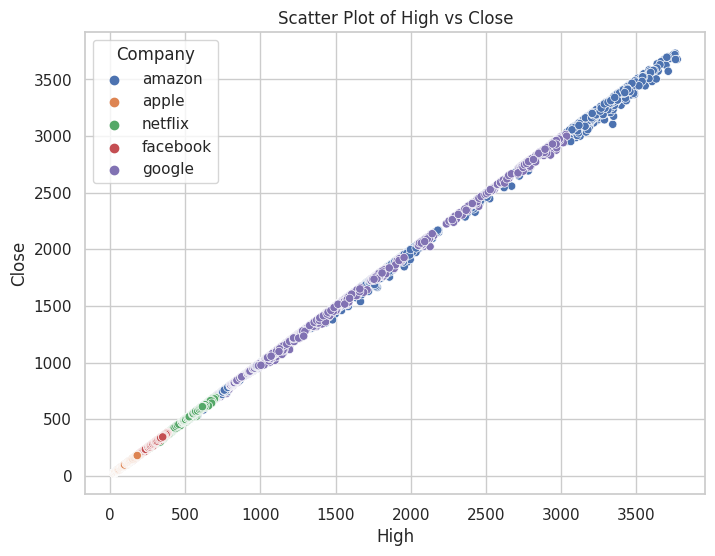

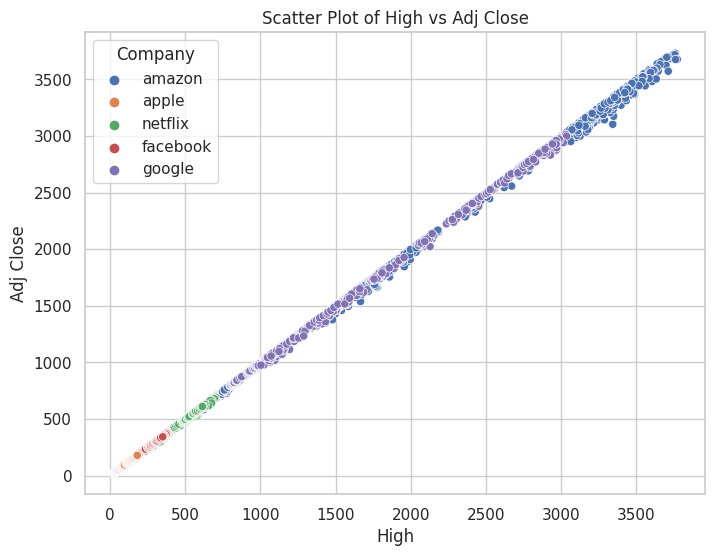

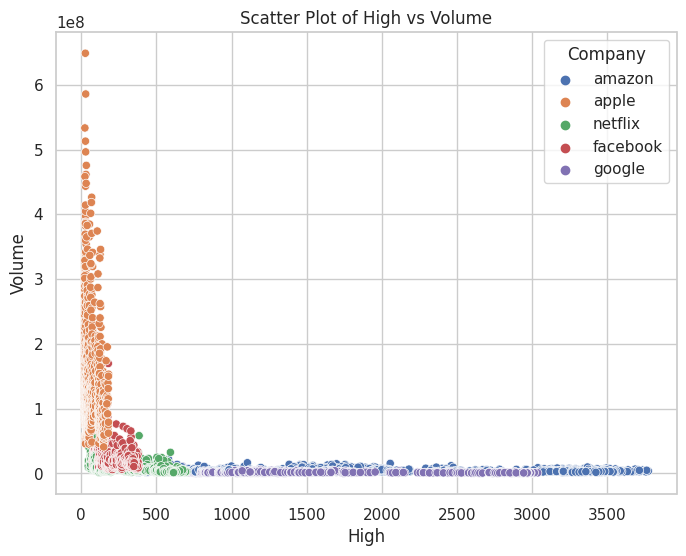

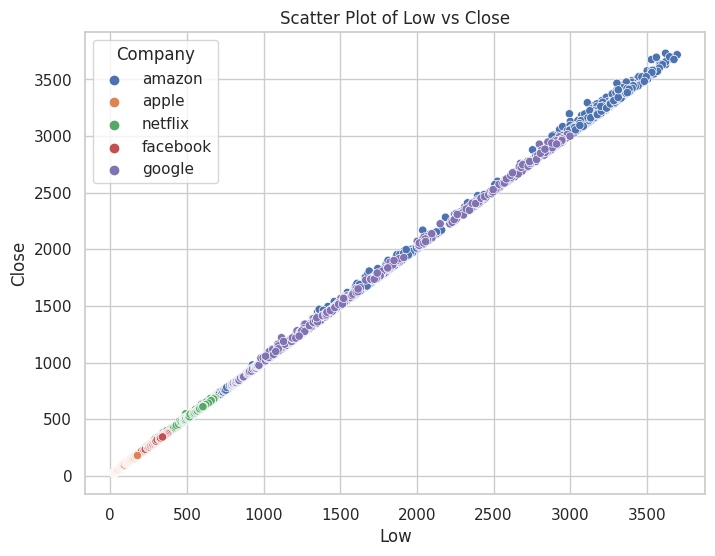

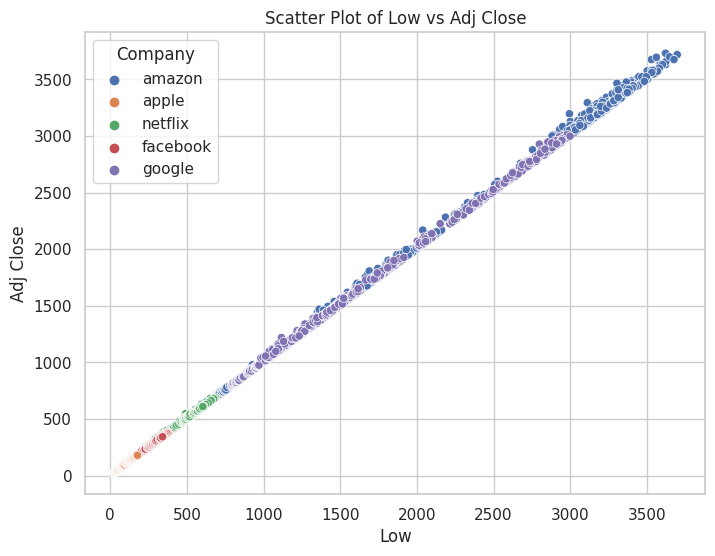

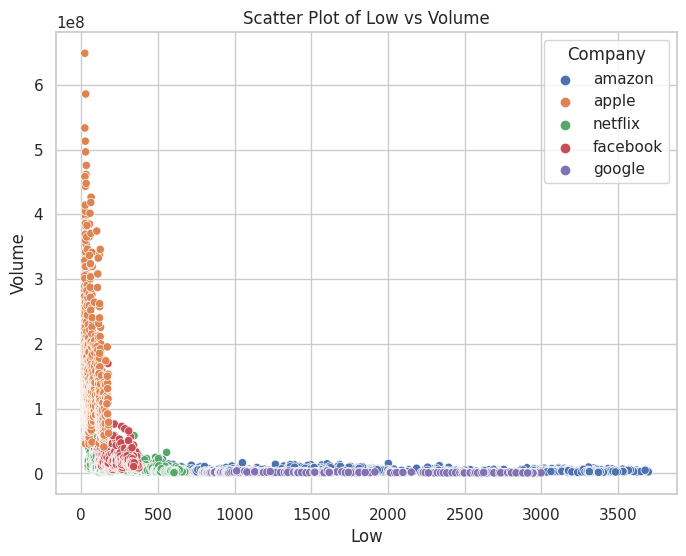

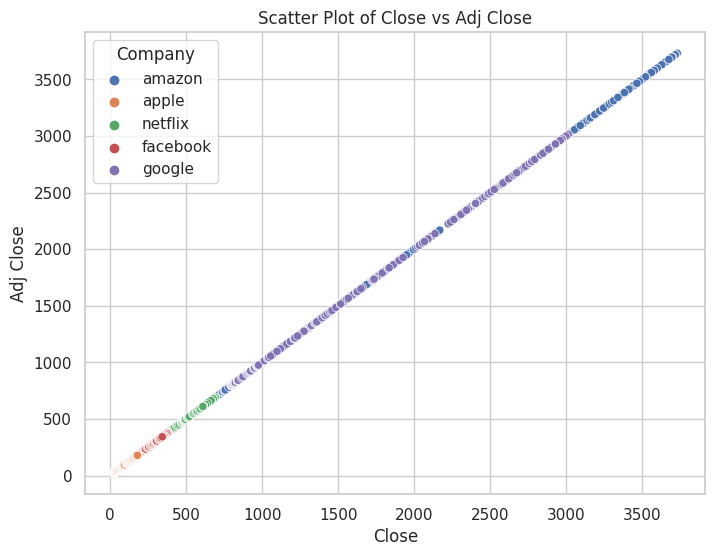

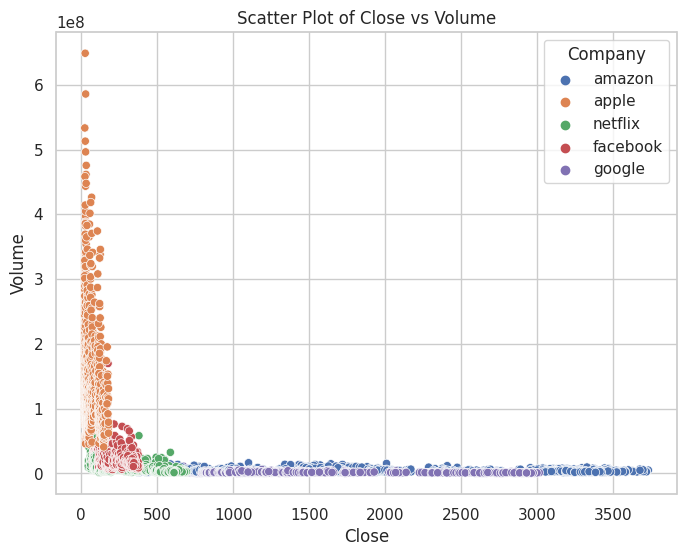

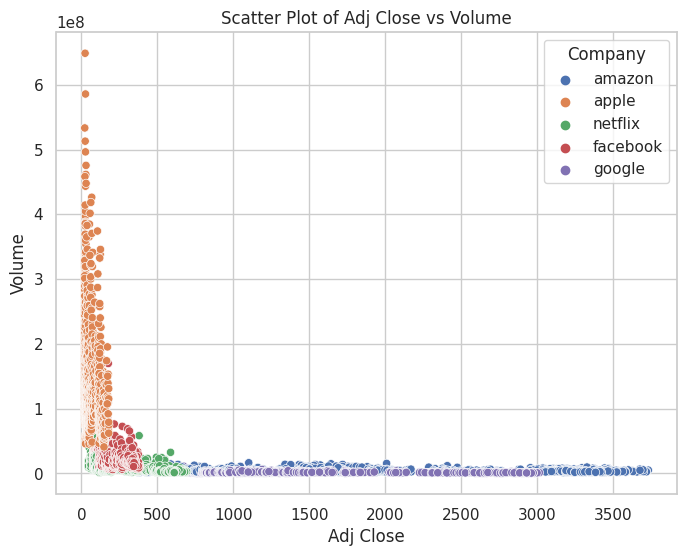

In [36]:
# Visualizing relationships between numerical variables using scatter plots
for i in range(len(numerical_vars)):
     for j in range(i+1, len(numerical_vars)):
         plt.figure(figsize=(8, 6))
         sns.scatterplot(data=FAANG_Dataset, x=numerical_vars[i], y=numerical_vars[j], hue='company')
         plt.title(f'Scatter Plot of {numerical_vars[i]} vs {numerical_vars[j]}')
         plt.xlabel(numerical_vars[i])
         plt.ylabel(numerical_vars[j])
         plt.legend(title='Company')
         plt.show()

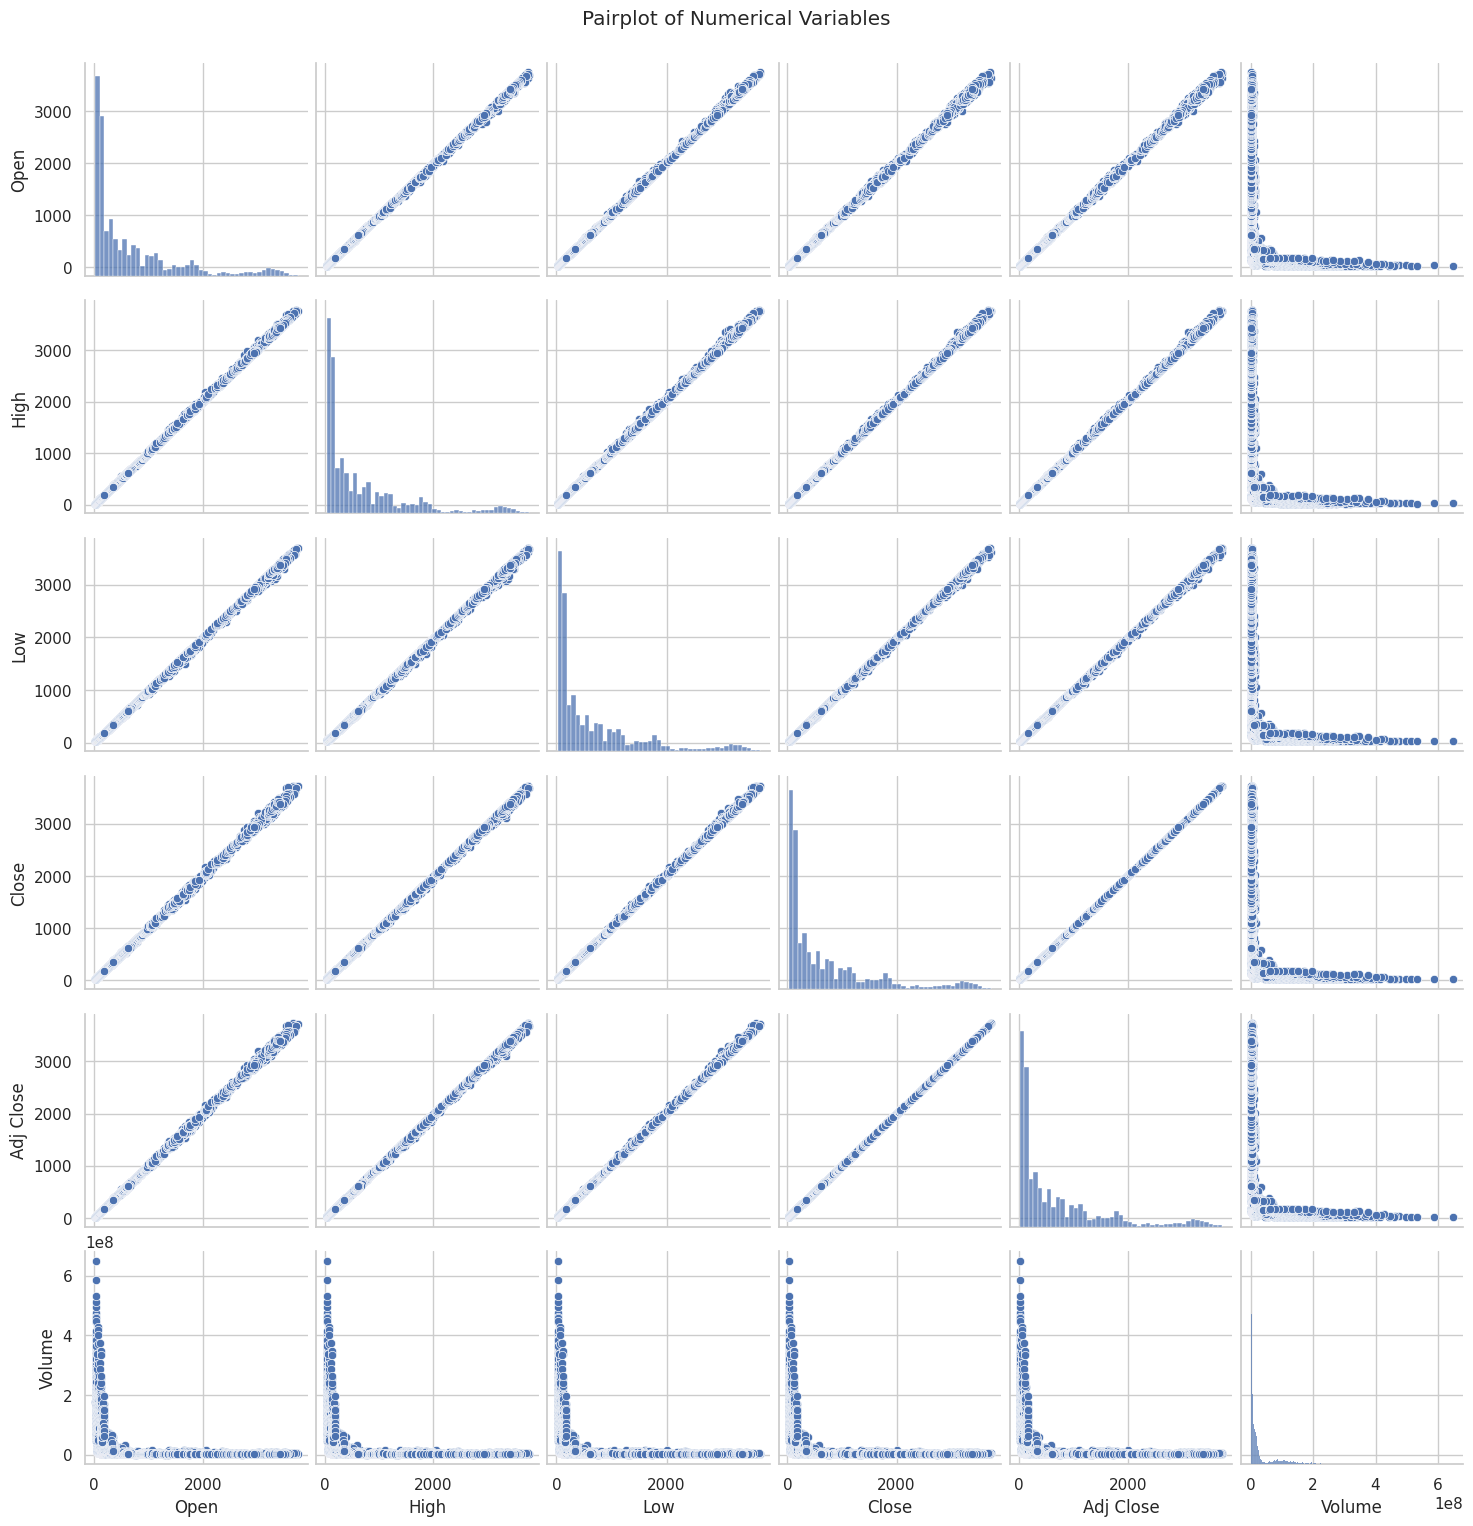

In [37]:
# Visualizing relationships between numerical variables using a pairplot
sns.pairplot(FAANG_Dataset[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

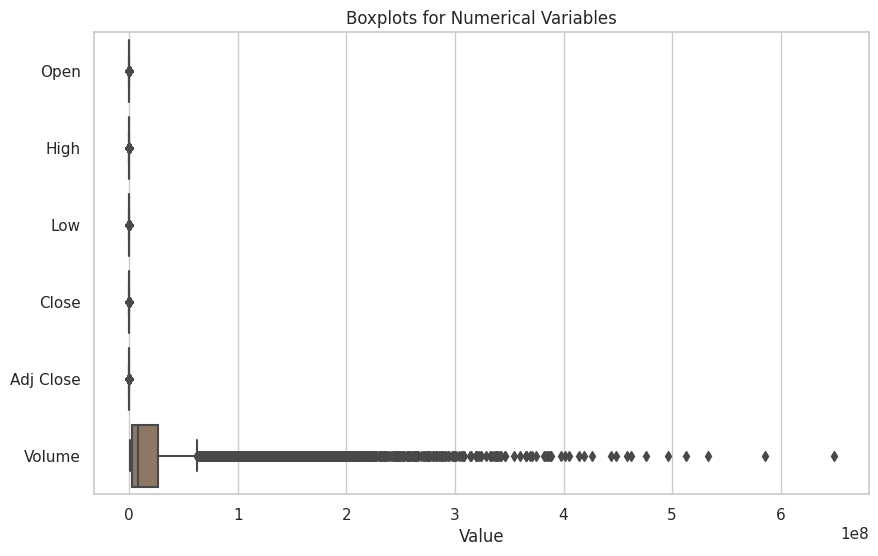

In [38]:
# Visualizing boxplots for numerical variables to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=FAANG_Dataset[numerical_vars], orient='h')
plt.title('Boxplots for Numerical Variables')
plt.xlabel('Value')
plt.show()


In [39]:
FAANG_Dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,amazon
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745996,212818400,apple
0,2015-01-02,49.151428,50.331429,48.731430,49.848572,49.848572,13475000,netflix
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500,facebook
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563,google


In [40]:
FAANG_Dataset.shape

(8805, 8)

# **Feature Engineering**

In [41]:
# Calculating Moving Averages (e.g., 7-day and 30-day)
def calculate_moving_averages(data, windows=[7, 30]):
    for window in windows:
        data[f'Close_MA_{window}'] = data.groupby('company')['Close'].transform(lambda x: x.rolling(window=window).mean())

# Calculating Volatility Measures (Daily Price Range)
def calculate_volatility(data):
    data['Volatility'] = data['High'] - data['Low']

# Calculating the Relative Strength Index (RSI)

def calculate_rsi(data, window=14):
    delta = data.groupby('company')['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    data['RSI'] = rsi

# Applying feature engineering functions
calculate_moving_averages(FAANG_Dataset, windows=[7, 30])
calculate_volatility(FAANG_Dataset)
calculate_rsi(FAANG_Dataset)

# Checking the dataset with new features
print(FAANG_Dataset.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-02  312.579987  314.750000  306.959991  308.519989  308.519989   
0 2015-01-02   27.847500   27.860001   26.837500   27.332500   24.745996   
0 2015-01-02   49.151428   50.331429   48.731430   49.848572   49.848572   
0 2015-01-02   78.580002   78.930000   77.699997   78.449997   78.449997   
0 2015-01-02  527.561584  529.815369  522.665039  523.373108  523.373108   

      Volume   company  Close_MA_7  Close_MA_30  Volatility  RSI  
0    2783200    amazon         NaN          NaN    7.790009  NaN  
0  212818400     apple         NaN          NaN    1.022501  NaN  
0   13475000   netflix         NaN          NaN    1.599999  NaN  
0   18177500  facebook         NaN          NaN    1.230003  NaN  
0    1447563    google         NaN          NaN    7.150330  NaN  


In [42]:
FAANG_Dataset.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
company          0
Close_MA_7      30
Close_MA_30    145
Volatility       0
RSI             13
dtype: int64

In [43]:
# Dropping rows with NaN values in the 'Close_MA_7' column
FAANG_Dataset = FAANG_Dataset.dropna(subset=['Close_MA_7'])

# Dropping rows with NaN values in the 'Close_MA_30' column
FAANG_Dataset = FAANG_Dataset.dropna(subset=['Close_MA_30'])

# Dropping rows with NaN values in the 'RSI' column
FAANG_Dataset = FAANG_Dataset.dropna(subset=['RSI'])

In [44]:
FAANG_Dataset.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
company        0
Close_MA_7     0
Close_MA_30    0
Volatility     0
RSI            0
dtype: int64

In [45]:
company_dummies = pd.get_dummies(FAANG_Dataset['company'], prefix='company')

FAANG_Dataset = pd.concat([FAANG_Dataset, company_dummies], axis=1)

In [46]:
FAANG_Dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company,Close_MA_7,Close_MA_30,Volatility,RSI,company_amazon,company_apple,company_facebook,company_google,company_netflix
29,2015-02-13,541.862305,548.404358,541.642944,547.506836,547.506836,1900303,google,534.427019,517.914734,6.761414,95.168720,0,0,0,1,0
29,2015-02-13,76.459999,76.480003,75.500000,75.739998,75.739998,18621900,facebook,75.455716,76.288000,0.980003,93.248583,0,0,1,0,0
29,2015-02-13,65.428574,66.629997,65.422859,66.585716,66.585716,12968900,netflix,64.653265,57.104857,1.207138,92.946687,0,0,0,0,1
29,2015-02-13,31.820000,31.820000,31.412500,31.770000,28.877089,217088800,apple,30.679643,28.572500,0.407500,92.521867,0,1,0,0,0
29,2015-02-13,378.410004,383.000000,377.010010,381.829987,381.829987,3475100,amazon,375.124290,325.786334,5.989990,93.741104,1,0,0,0,0


In [47]:
FAANG_Dataset1 = FAANG_Dataset.drop('Date',axis=1)

# **Data splitting**

In [48]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = FAANG_Dataset1[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close_MA_30', 'Volatility', 'RSI', 'company_amazon', 'company_apple', 'company_facebook', 'company_google', 'company_netflix']]
target = FAANG_Dataset1['Close']

# Splitting the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (6928, 13), Test set shape: (1732, 13)


# **Training XGBoostRegressor Model**

In [49]:
from xgboost import XGBRegressor


#  XGBoost example
XGB_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, eval_metric='rmse')
XGB_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)

[0]	validation_0-rmse:601.23421
[1]	validation_0-rmse:422.36690
[2]	validation_0-rmse:296.11637
[3]	validation_0-rmse:207.66846
[4]	validation_0-rmse:145.87592
[5]	validation_0-rmse:102.58847
[6]	validation_0-rmse:72.10943
[7]	validation_0-rmse:51.02140
[8]	validation_0-rmse:36.34322
[9]	validation_0-rmse:26.16957
[10]	validation_0-rmse:19.49490
[11]	validation_0-rmse:15.01418
[12]	validation_0-rmse:12.29012
[13]	validation_0-rmse:10.63262
[14]	validation_0-rmse:9.78005
[15]	validation_0-rmse:9.25241
[16]	validation_0-rmse:8.86691
[17]	validation_0-rmse:8.70946
[18]	validation_0-rmse:8.60883
[19]	validation_0-rmse:8.54781
[20]	validation_0-rmse:8.64238
[21]	validation_0-rmse:8.62311
[22]	validation_0-rmse:8.63274
[23]	validation_0-rmse:8.68656
[24]	validation_0-rmse:8.67287
[25]	validation_0-rmse:8.68234
[26]	validation_0-rmse:8.68515
[27]	validation_0-rmse:8.67862
[28]	validation_0-rmse:8.69418


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on test set
predictions = XGB_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2}")
n = len(X_test)  # Number of samples in validation set
p = len(X_test.columns)  # Number of predictors

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"Adjusted R-squared: {adjusted_r2}")

print(f"Mean Squared Error: {mse}, Mean Absolute Error: {mae}")

Root Mean Squared Error (RMSE): 8.547805923573332
R-squared (R2): 0.9999002924499013
Adjusted R-squared: 0.9998995379690216
Mean Squared Error: 73.06498610707533, Mean Absolute Error: 4.064034963313501


# **Training GPT-2 Model**

In [51]:
from sklearn.model_selection import train_test_split
FAANG_Dataset= FAANG_Dataset.sort_values(by='Date')
Considered_Variables_Dataset = FAANG_Dataset[['Date','High','Close','company']].copy()

In [52]:
Considered_Variables_Dataset.head()

,Date,High,Close,company
29,2015-02-13,548.404358,547.506836,google
29,2015-02-13,76.480003,75.739998,facebook
29,2015-02-13,66.629997,66.585716,netflix
29,2015-02-13,31.820000,31.770000,apple
29,2015-02-13,383.000000,381.829987,amazon


In [53]:
# Calculating splitting size (80% for training, 20% for testing)

training_data_size = int(len(Considered_Variables_Dataset) * 0.8)

testing_data_size = len(Considered_Variables_Dataset) - training_data_size

In [54]:
# Performing Train and Test split on the Dataset

data_train = Considered_Variables_Dataset.iloc[:training_data_size]
data_test = Considered_Variables_Dataset.iloc[training_data_size:]

In [55]:
# Printing lengths of the split datasets
print("Training dataset length:", len(data_train))
print("Test dataset length:", len(data_test))

Training dataset length: 6928
Test dataset length: 1732


In [56]:
# Initializing an empty list to store all the input prompts
List_for_saving_prompts = []
# Iterating through each row in the Training dataset to train each row in the dataset that consists of different text and appending it to the created list.
for index, row in data_train.iterrows():
    date = row['Date']
    closing_price = row['Close']
    com=row['company']
    high_closing_price =row['High']

    # Creating a textfor each row for the informations that are provided
    training_prompts = f"For date {date}, comapany {com} given the highes price {high_closing_price} the closing price is {closing_price}."

    # Appending each  to the list
    List_for_saving_prompts.append(training_prompts)

In [57]:

# Joining all sentences to form a text so that the whole text makes sense.
texts_creation = ' '.join(List_for_saving_prompts)
# Defining a file path and name
path_text_file = 'Faang_dataset_training_file.txt'
# Saving the created text file so that we can use it in further process
with open(path_text_file, 'w') as file:
    file.write(texts_creation)
print(f"All informaion added into {path_text_file}")

All informaion added into Faang_dataset_training_file.txt


In [58]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import Trainer, TrainingArguments
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel, GPT2TokenizerFast, GPT2Tokenizer

In [59]:
pip install transformers[torch]

In [60]:

# Loading the required dataset, train model, and other parameters for this training settings.

# Training settings

file_train_path = "Faang_dataset_training_file.txt"
name_model = 'gpt2'
dir_output = 'save_info'
overwrite_output_dir = False
batch_train = 16
epochs = 10
steps_save = 10000

### Defining :Function for loading the Datsets and to apply LLM tuning

---



In [61]:
def train_load_dataset(path, tokenizer, block_size = 128):
    given_data = TextDataset(
        tokenizer = tokenizer,
        file_path = path,
        block_size = block_size,
    )
    return given_data

def collator_data(tokenizer, mlm = False):
    collator_data = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=mlm,
    )
    return collator_data

def llm_training(file_path,model_name,
          output_dir,
          output_overwrite,
          per_device_train_batch_size,
          num_train_epochs,
          save_steps):
    return llm_training

In [62]:
pip install transformers[torch]

In [63]:
#using pre-trained gpt model along with tokenizer and data collator and then use it is tuned morewith all training arguments.
tokenizer = GPT2Tokenizer.from_pretrained(name_model)
training_dataset = train_load_dataset(file_train_path, tokenizer)
collator_data = collator_data(tokenizer)

tokenizer.save_pretrained(dir_output)

model = GPT2LMHeadModel.from_pretrained(name_model)

model.save_pretrained(dir_output)

training_args = TrainingArguments(
        output_dir=dir_output,
        overwrite_output_dir=overwrite_output_dir,
        per_device_train_batch_size=batch_train,
        num_train_epochs=epochs,
    )

trainer = Trainer(
          model=model,
          args=training_args,
          data_collator=collator_data,
          train_dataset=training_dataset,
)

trainer.train()
trainer.save_model()

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Step,Training Loss
500,0.803600
1000,0.649000


In [64]:
# Training the Model with above chosen parameters
llm_training(
    file_path=file_train_path,
    model_name=name_model,
    output_dir=dir_output,
    output_overwrite=overwrite_output_dir,
    per_device_train_batch_size=batch_train,
    num_train_epochs=10,
    save_steps=steps_save
)

<function __main__.llm_training(file_path, model_name, output_dir, output_overwrite, per_device_train_batch_size, num_train_epochs, save_steps)>

In [65]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_prediction_by_text(model_path, sequence_given_prompt, max_len):
    # Load pre-trained GPT-2 model and tokenizer
    model = GPT2LMHeadModel.from_pretrained(model_path)
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)

    # Tokenize the input sequence
    input_ids = tokenizer.encode(sequence_given_prompt, return_tensors='pt')

    # Generate predictions
    output = model.generate(input_ids, max_length=max_len, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95)

    # Decode the generated output
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    return generated_text

In [66]:
model_path = "save_info"
sequence_given_prompt = "[Q] What is Closing price of Amazon on 2014-08-07 ?"
max_len = 200
result = generate_prediction_by_text(model_path, sequence_given_prompt, max_len)

print(result)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[Q] What is Closing price of Amazon on 2014-08-07? $119.599976 the closing price is 1191.0. For date 2015-09-03 00:00:01, comapany google given the highes price 534.929993 the offering price was 527.829987. The closing bid is 526.799988.

15002499 the registrant is 530.859985.


In [67]:
# Using the trained model to predict prices for test data
for index, row in data_test[:5].iterrows():
    date = row['Date']
    company = row['company']
    given_prompt = f"[Q] What is the expected close price of {company} on {date}"

    prediction = generate_prediction_by_text(model_path, given_prompt, max_len)

    print(f"For {company} on {date}, the model predicts: {prediction}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


For google on 2020-08-14 00:00:00, the model predicts: [Q] What is the expected close price of google on 2020-08-14 00:00:00, comapany amazon given the highes price 2375.0 the closing price is 2364.910034. For date 2019-07-15 00.030029 The following is a list of the most recent netflix price 348.100006 the next closest is 345.899994.

19995101001 the latest is 344.619995.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


For amazon on 2020-08-14 00:00:00, the model predicts: [Q] What is the expected close price of amazon on 2020-08-14 00:00:00, comapany netflix given the highes price 360.0 the closing price is 359.600006. For date 2019-07-15 00.030029 The following is a list of the most recent price 1846.900024:

1999510108.420044 the latest is 1839.51001 from the registrant.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


For amazon on 2020-08-17 00:00:00, the model predicts: [Q] What is the expected close price of amazon on 2020-08-17 00:00:00, comapany netflix given the highes price 360.0 the closing price is 359.600006. For date 2019-07-18 00.030029 The following is a list of the most recent price 1846.900024:

1999510108.420044 the latest is 1839.51001 from the date 1901.050049 the earliest date is 1863.829956. To date 1841.400024 the closest date currently stands at 1838.719971. The date 2022.800049 is 1840.01001.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


For apple on 2020-08-17 00:00:00, the model predicts: [Q] What is the expected close price of apple on 2020-08-17 00:00:00, comapany amazon given the highes price 2375.0 the closing price is 2364.910034. For date 2019-07-18 00.030029 The following is a list of the most recent netflix price 357.100006 the following: 1935.829956. To date 2018-06-19 00-03:59:03,comparison apple price 233.339996 the opening bid is 232.699997. The closing offer is 231.759995.

apollo.computername apple is 234.059998 the offering price was 235.019989. On the date 2020.009973, for date 2024.319946, apple currently sells for 225.830002. In the event of a sell-off, price 2026.52002 is 2023.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


For facebook on 2020-08-17 00:00:00, the model predicts: [Q] What is the expected close price of facebook on 2020-08-17 00:00:00, comapany amazon given the highes price 2375.0 the closing price is 2364.910034. For date 2019-07-18 00.00 ametag the google given price 1205.599976 the netflix price 366.100006 is 361.899994.

199951-02-19 00-0300 UTC: The following is a list of the most recent google grantees:
.050003 the opening price was 1201.420044, closing prices are 1199.609985. The closing date is 1189.400024.
